# Backtesting ML Classification-Based

Here are the key takeaways from the video "First configurations of the strategy class":

Loading the Model: The video explains how to load the previously computed machine learning model from a file using the load function.
Setting Up the Strategy Class: It covers the creation of a strategy class named classificationUpAndDown, which includes defining the init and next functions.
Implementing the Investment Strategy: The init function initializes the model, while the next function uses the model to make buy or sell decisions based on critical columns (open, high, low, close, and volume) from the dataset.

This video is crucial for understanding how to integrate machine learning models into trading strategies.

In [ ]:
???

![](src/res_classification.png)

## Load the model

In [2]:
import pickle  # Import the pickle module to load the serialized model
import pandas as pd  # Import pandas for data manipulation and analysis
from backtesting import Backtest, Strategy  # Import Backtest and Strategy from the backtesting library

In [3]:
import os
print(os.listdir('models'))


['model_dt_classification.pkl', 'OLD-model_dt_classification.pkl', 'OLD-model_dt_regression.pkl']


In [4]:
# Load the decision tree classification model from a pickle file
with open('models/model_dt_classification.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [5]:
model_dt  # Display the loaded model

DecisionTreeClassifier(max_depth=15)

## Load the data

In [6]:
# import pandas as pd  # Import pandas for data manipulation and analysis
# Load the processed LinkedIn data from an Excel file into a DataFrame
df = pd.read_excel('data/INTC_subset_Processed.xlsx', index_col=0, parse_dates=['Date'])
df  # Display the DataFrame

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284,DOWN
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661,DOWN
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929,DOWN
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833,UP
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489,UP
...,...,...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900,-0.041824,DOWN
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162,DOWN
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559,DOWN


## Backtesting.py Library

### Create your Strategy Class

In [ ]:
#pip install backtesting

In [ ]:
#from backtesting import Backtest, Strategy # Import the pickle module to load the serialized model

In [7]:
# Create a new DataFrame `df_explanatory` with the necessary columns for explanatory variables
df_explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [8]:
# Display the last row of the explanatory DataFrame
df_explanatory.iloc[-1:, :] 

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-02,22.67,23.07,22.35,22.389999,59033900


In [9]:
# Show the last entry in the column 'change_tomorrow_direction' (assumed column exists in the data)
df.change_tomorrow_direction[-1:]

Date
2024-10-02    DOWN
Name: change_tomorrow_direction, dtype: object

#### Simulate the prediction for the last observation

In [10]:
# Use the loaded model to predict the direction of the stock for the explanatory variables
model_dt.predict(X=df_explanatory)

array(['DOWN', 'DOWN', 'DOWN', ..., 'DOWN', 'DOWN', 'DOWN'], dtype=object)

In [11]:
# Extract the latest row of explanatory data (today's data)
explanatory_today = df_explanatory.iloc[[-1],:]

In [12]:
# Predict tomorrow's direction based on today's data
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

#### Write the prediction process in the Strategy class

In [13]:
# Define a custom strategy class for classification-based stock trading
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt  # Initialize the model in the strategy

    def next(self):
        # Extract the latest row of explanatory data and forecast the next direction
        explanatory_today = df_explanatory.iloc[[-1],:]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]
        
        # conditions to sell or buy

#### Calculate Purchase Recommendation

##### Buy if it goes up

In [14]:
# Initialize a list to store the buy signals
list_buy = []

In [15]:
# Loop over the 'change_tomorrow_direction' column to generate buy signals (1 for 'UP', 0 for 'DOWN')
for direction_tomorrow in df.change_tomorrow_direction:
    if direction_tomorrow == 'UP':
        list_buy.append(1)
    else:
        list_buy.append(0)

In [16]:
# Add the 'buy' column to the DataFrame based on the buy signals
df['buy'] = list_buy
df  # Display the DataFrame with the new 'buy' column

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy
Date,,,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284,DOWN,0
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661,DOWN,0
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929,DOWN,0
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833,UP,1
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489,UP,1
...,...,...,...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900,-0.041824,DOWN,0
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162,DOWN,0
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559,DOWN,0


##### Buy if it goes and sell if down

> You can only sell if you have already bought

In [17]:
# Initialize a list for buy/sell signals and a flag to track whether we've already bought
list_buy_sell = []
already_bought = False

In [18]:
# Loop to generate buy/sell signals based on direction and whether already bought
for direction_tomorrow in df.change_tomorrow_direction:
    if direction_tomorrow == 'UP' and already_bought == False:
        list_buy_sell.append(1)  # Buy if the direction is 'UP' and we haven't bought yet
        already_bought = True  # Update the flag to indicate we have bought
    elif direction_tomorrow == 'DOWN' and already_bought == True:
        list_buy_sell.append(-1)  # Sell if the direction is 'DOWN' and we already bought
        already_bought = False  # Update the flag to indicate we have sold
    else:
        list_buy_sell.append(0)  # No action if none of the conditions are met

In [19]:
# Add the 'buy_sell' column to the DataFrame with the generated signals
df['buy_sell'] = list_buy_sell
df  # Display the DataFrame with the new 'buy_sell' column

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy,buy_sell
Date,,,,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284,DOWN,0,0
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661,DOWN,0,0
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929,DOWN,0,0
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833,UP,1,1
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489,UP,1,0
...,...,...,...,...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900,-0.041824,DOWN,0,-1
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162,DOWN,0,0
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559,DOWN,0,0


#### Add conditions to the strategy

In [20]:
# Define another strategy class that adds conditions for buy/sell signals based on model predictions
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model_dt  # Initialize the model
        self.already_bought = False  # Flag to track buy/sell status

    def next(self):
        # Get the latest row of data and forecast tomorrow's direction
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # Buy if the forecast is 'UP' and we haven't bought yet
        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()  # Execute a buy order
            self.already_bought = True  # Set flag to indicate we have bought
        # Sell if the forecast is 'DOWN' and we already bought
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()  # Execute a sell order
            self.already_bought = False  # Reset the flag to indicate we have sold
        else:
            pass  # No action if none of the conditions are met

### Define initial conditions

In [21]:
# Define initial conditions for the backtest, using the SimpleClassificationUD strategy
bt = Backtest(df_explanatory, SimpleClassificationUD,
              cash=10000,  # Starting cash for the backtest
              commission=.002,  # Set commission fee for trades
              exclusive_orders=True)  # Ensure only one order can be executed at a time (no overlap)


### Run backtesting

In [22]:
# Run the backtest with the defined parameters and strategy
results = bt.run()

### Interpret backtesting results

In [23]:
# Display the backtest results, focusing on the 'Return [%]' and other key metrics
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2020-01-02 00:00:00
End,2024-10-02 00:00:00
Duration,1735 days 00:00:00
Exposure Time [%],99.665552
Equity Final [$],12184028.250128
Equity Peak [$],12184028.250128
Return [%],121740.282501


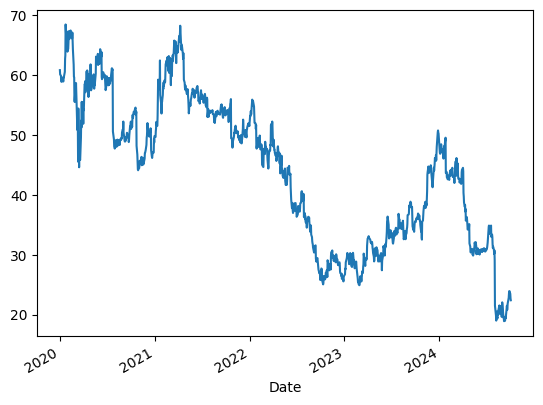

In [24]:
# Plot the closing prices of the stock to visualize the performance
df.Close.plot();

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="03D_Backtesting ML Classification-Based.ipynb">notebook</a>.